# Toroidal coordinates on bullseye

An example of how toroidal coordinates is more reliable than circular coordinates when more than one prominent class is present. In this example, we seek to find a single circle-valued map that parametrizes all circularities present in the data at once. For this, we first find a circle-valued map representing each class and then add together these circle-valued maps into a single circle-valued map.

We use two approaches. In one, we use toroidal coordinates to find three "geometrically independent" circle-valued maps and then sum them together. In the second, we run circular coordinates three times with different cocycles and sum the output circle-valued maps together.

In [1]:
import matplotlib.pyplot as plt
from dreimac import ToroidalCoords, CircularCoords, GeometryExamples, CircleMapUtils
from persim import plot_diagrams

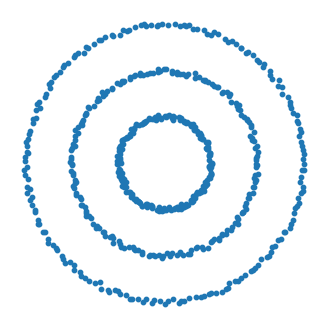

In [2]:
X = GeometryExamples.bullseye()
plt.figure(figsize=(4,4))
plt.scatter(X[:,0],X[:,1], s = 10)
plt.gca().set_aspect("equal") ; _ = plt.axis("off")

The persistence diagram suggests that there are three prominent 1-dimensional holes.

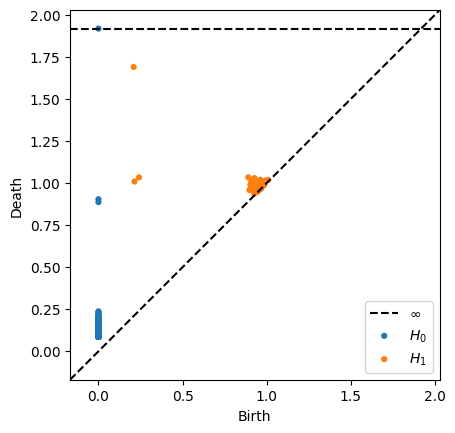

In [3]:
n_landmarks = 300

tc = ToroidalCoords(X, n_landmarks=n_landmarks)
plot_diagrams(tc.dgms_)

We now run the toroidal coordinates algorithm with the 3 most prominent classes and plot the result.

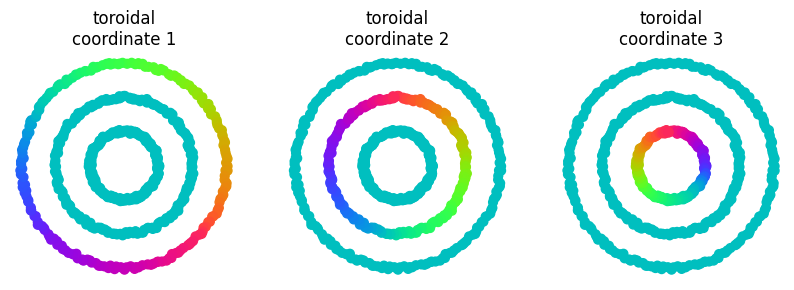

In [4]:
perc = 0.1
cohomology_classes = [0, 1, 2]

toroidal_coords = tc.get_coordinates(perc=perc, cocycle_idxs=cohomology_classes)

plt.figure(figsize=(10, 4))
for i, coord in enumerate(toroidal_coords):
    plt.subplot(1, len(toroidal_coords), i + 1)
    plt.scatter(X[:, 0], X[:, 1], s=40, c=CircleMapUtils.to_sinebow(coord))
    plt.title("toroidal\ncoordinate " + str(i+1))
    plt.gca().set_aspect("equal")
    _ = plt.axis("off")


We now sum the three maps returned by toroidal coordinates and display it

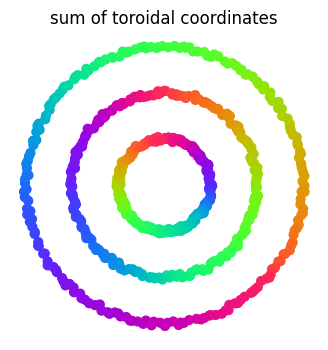

In [6]:

t_sum = CircleMapUtils.linear_combination(toroidal_coords, [1, 1, 1])

plt.figure(figsize=(4,4))
plt.scatter(X[:,0],X[:,1], s = 40, c=CircleMapUtils.to_sinebow(t_sum))
plt.title("sum of toroidal coordinates")
plt.gca().set_aspect("equal") ; _ = plt.axis("off")

Run circular coordinates algorithm with three most prominent classes

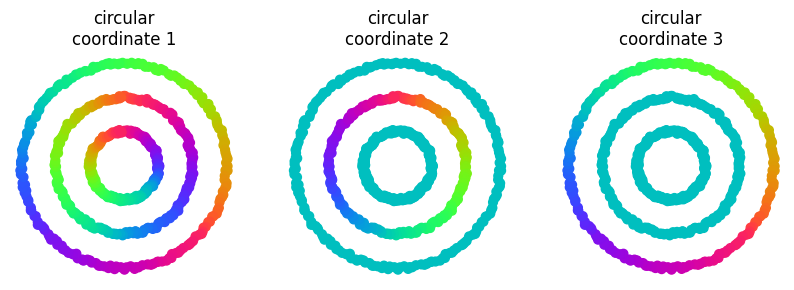

In [9]:
cc = CircularCoords(X, n_landmarks=n_landmarks)
circular_coords1 = cc.get_coordinates(perc=perc, cocycle_idx=cohomology_classes[0])
circular_coords2 = cc.get_coordinates(perc=perc, cocycle_idx=cohomology_classes[1])
circular_coords3 = cc.get_coordinates(perc=perc, cocycle_idx=cohomology_classes[2])
circular_coords = [circular_coords1, circular_coords2, circular_coords3]

plt.figure(figsize=(10, 4))
for i, coord in enumerate(circular_coords):
    plt.subplot(1, len(circular_coords), i + 1)
    plt.scatter(X[:, 0], X[:, 1], s=40, c=CircleMapUtils.to_sinebow(coord))
    plt.title("circular\ncoordinate " + str(i+1))
    plt.gca().set_aspect("equal")
    _ = plt.axis("off")

Finally, see how the sum of the three maps returned by the circular coordinates algorithm fails to parametrize the three circles properly

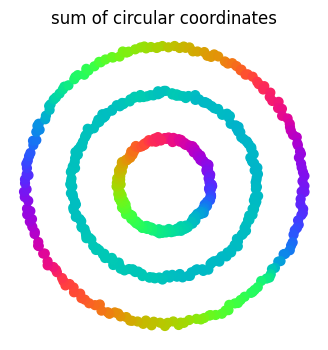

In [10]:
c_sum = CircleMapUtils.linear_combination(circular_coords, [1, 1, 1])

plt.figure(figsize=(4,4))
plt.scatter(X[:,0],X[:,1], s = 40, c=CircleMapUtils.to_sinebow(c_sum))
plt.title("sum of circular coordinates")
plt.gca().set_aspect("equal") ; _ = plt.axis("off")